In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('laptop.csv')

In [4]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [5]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Name', 'Price', 'Processor_Name',
       'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter',
       'Battery_Life'],
      dtype='object')

## Data cleaning

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
def convert_ram_value(value):
    if 'Not Expandable' in value:
        return 0
    else:
        return int(value.split()[0])

df['RAM_Expandable'] = df['RAM_Expandable'].apply(convert_ram_value)

In [8]:
def ram(value):
    return int(value.split()[0])

df['RAM'] = df['RAM'].apply(ram)

In [9]:
def Ghz(value):
    return float(value.split()[0])

df['Ghz'] = df['Ghz'].apply(Ghz)

In [10]:
def display(value):
    if value == 'OLED Display With Touchscreen':
        return 12.2
    else:
        return float(value)

df['Display'] = df['Display'].apply(display)

In [11]:
def ssd(value):
    if value == 'NO SSD':
        return 0
    else: 
        return int(value.split()[0])

df['SSD'] = df['SSD'].apply(ssd)

In [12]:
def adp(value):
    if value == 'no':
        return 0
    return int(value)

df['Adapter'] = df['Adapter'].apply(adp)

In [23]:
df['GPU_Brand'] = df['GPU_Brand'].replace(['NIVIDIA', 'Nvidia'], 'NVIDIA')

# Verify the unique values after correction
print(df['GPU_Brand'].unique())

['MediaTek' 'AMD' 'NVIDIA' 'Intel' 'Apple' 'Qualcomm' 'ARM' nan
 'Microsoft' 'ATI']


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            3976 non-null   object 
 1   Name             3976 non-null   object 
 2   Price            3976 non-null   int64  
 3   Processor_Name   3976 non-null   object 
 4   Processor_Brand  3976 non-null   object 
 5   RAM_Expandable   3976 non-null   int64  
 6   RAM              3976 non-null   int64  
 7   RAM_TYPE         3976 non-null   object 
 8   Ghz              3976 non-null   float64
 9   Display_type     3976 non-null   object 
 10  Display          3976 non-null   float64
 11  GPU              3968 non-null   object 
 12  GPU_Brand        3972 non-null   object 
 13  SSD              3976 non-null   int64  
 14  HDD              3976 non-null   object 
 15  Adapter          3976 non-null   int64  
 16  Battery_Life     3558 non-null   object 
dtypes: float64(2),

## Data Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Bar chart

/tmp/ipykernel_45512/3567207822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Brand',data=df,palette="Set2")


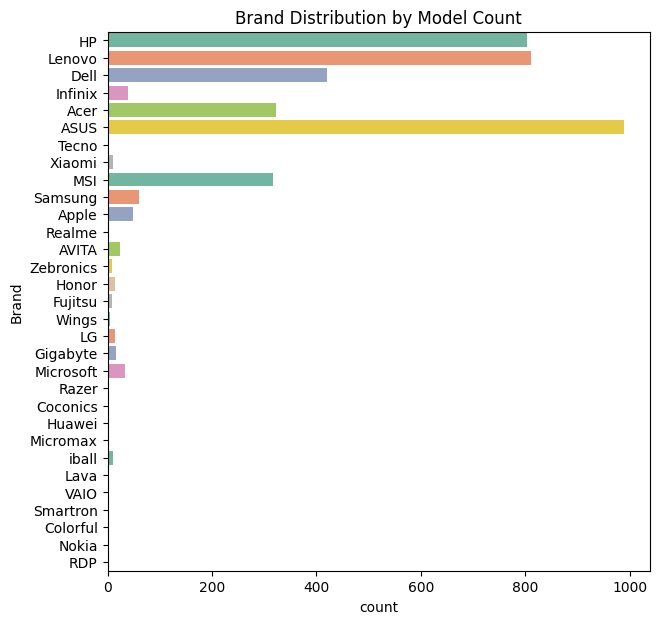

In [15]:
plt.figure(figsize=(7,7))
plt.title('Brand Distribution by Model Count')
sns.countplot(y='Brand',data=df,palette="Set2")
plt.show()

### Line Chart

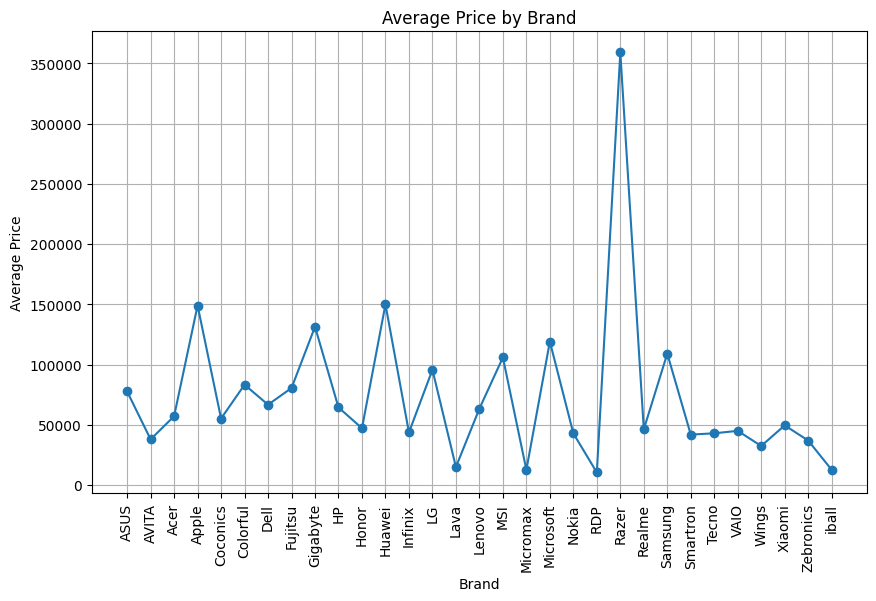

In [16]:
# Calculate the average price grouped by brand
average_price_by_brand = df.groupby('Brand')['Price'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_brand['Brand'], average_price_by_brand['Price'], marker='o')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Pie Chart

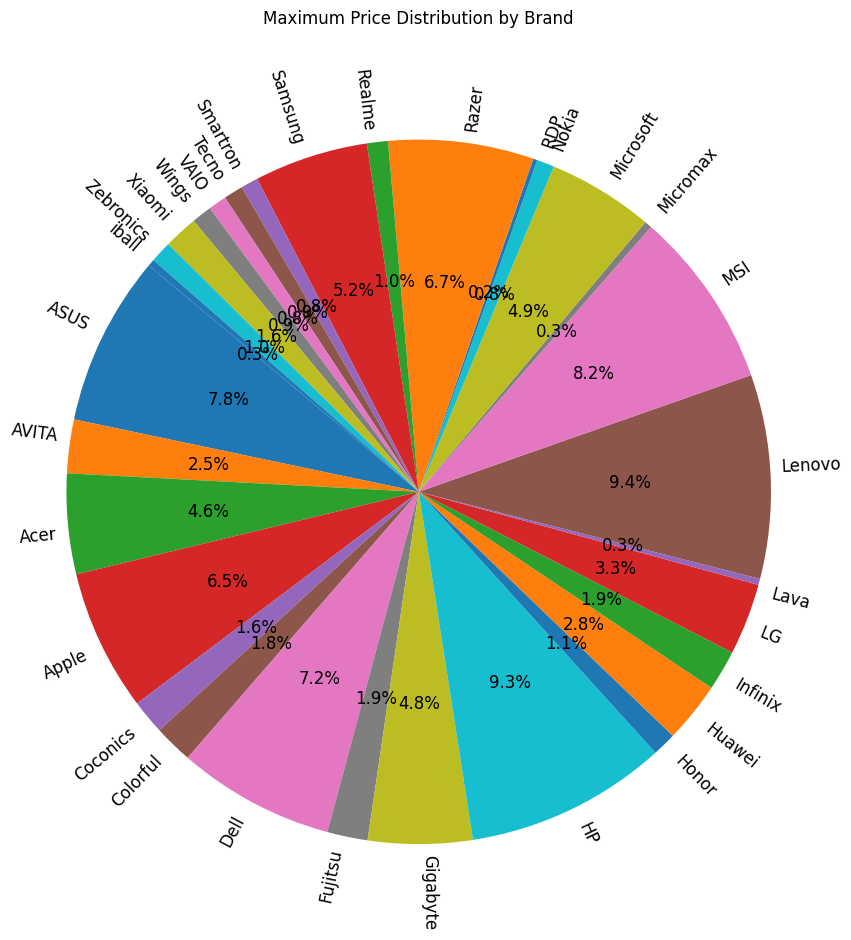

In [17]:
# Calculate the maximum price grouped by brand
max_price_by_brand = df.groupby('Brand')['Price'].max().reset_index()

# Plot the pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    max_price_by_brand['Price'], 
    labels=max_price_by_brand['Brand'], 
    autopct='%1.1f%%', 
    startangle=140, 
    textprops={'fontsize': 12},  # Adjust the font size
    rotatelabels=True,  # Enable text rotation to avoid overlap
    labeldistance=1.03,  # Set the distance of the labels from the center
)

plt.title('Maximum Price Distribution by Brand',pad=60)
plt.axis('equal')

plt.show()


### Histogram

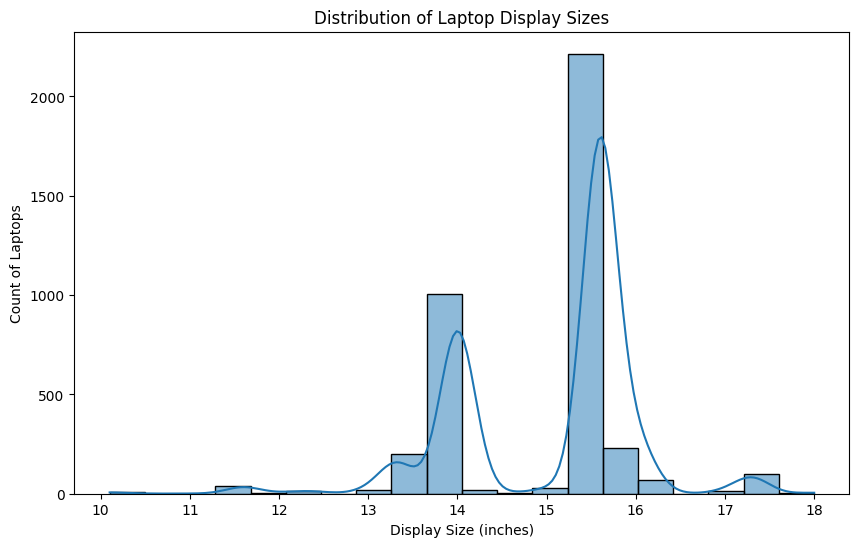

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Display'], bins=20, kde=True)
plt.title('Distribution of Laptop Display Sizes')
plt.xlabel('Display Size (inches)')
plt.ylabel('Count of Laptops')
plt.show()

### Bubble chart

In [25]:
import plotly.express as px

# Group by Brand and GPU_Brand and count the occurrences
df_grouped = df.groupby(['Brand', 'GPU_Brand']).size().reset_index(name='Count')

# Create a bubble chart
fig = px.scatter(df_grouped, x="Brand", y="GPU_Brand", 
                 size="Count", color="GPU_Brand", 
                 hover_name="Brand", size_max=60)

# Show the chart
fig.show()
